# Baseball Case Study Project

# Intoduction

In this case study, we aim to develop a machine learning algorithm to predict the number of wins for Major League Baseball teams based on various indicators of success from the 2014 season. The dataset includes 16 different features that will be used as inputs to the machine learning model, with the number of wins as the target variable. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Exploration

# Data Loading

1.Load the dataset from the provided link.
2.Display the first few rows of the dataset to understand its structure.

In [2]:
df=pd.read_csv('Baseball.csv')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Data Exploration

Explore the dataset to understand its features, data types, and statistical summary.
Check for missing values, outliers, and data distributions.
Visualize the data using plots to gain insights into feature distributions and relationships.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (30, 17)


In [9]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (30, 17)


In [10]:
print("Columns and Data Types:")
print(df.dtypes)

Columns and Data Types:
W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


In [11]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [13]:
df.nunique().to_frame("unique values")

,unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


<Axes: >

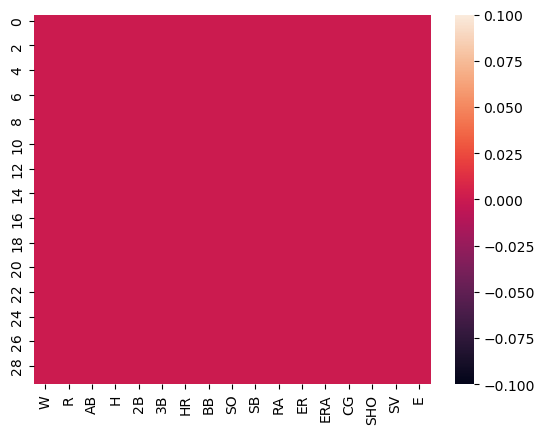

In [14]:
sns.heatmap(df.isnull())

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

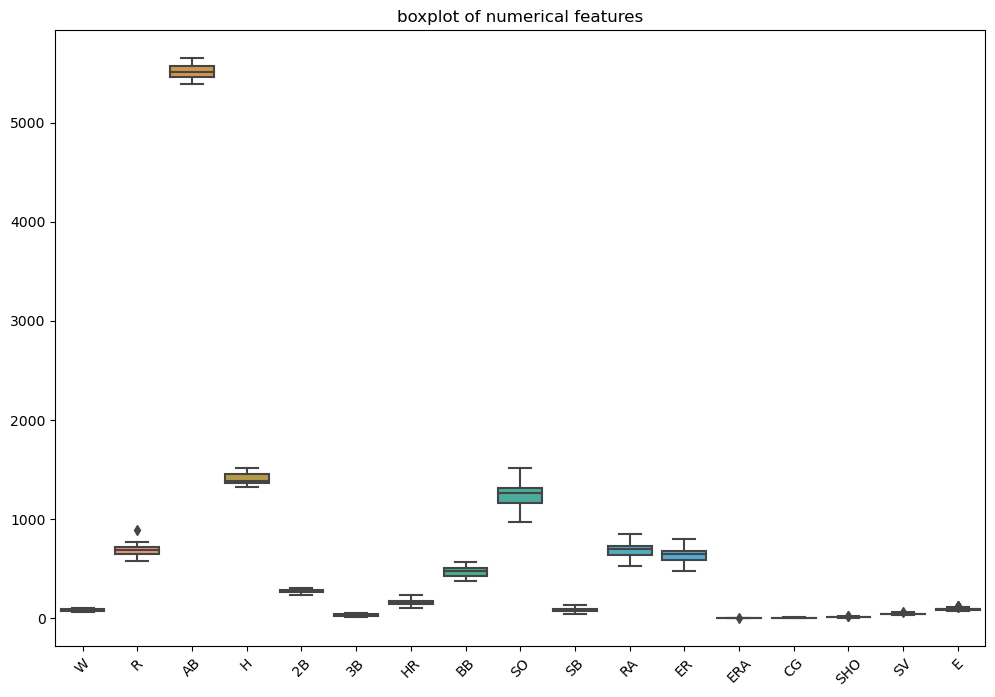

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title("boxplot of numerical features")
plt.xticks(rotation=45)
plt.show()

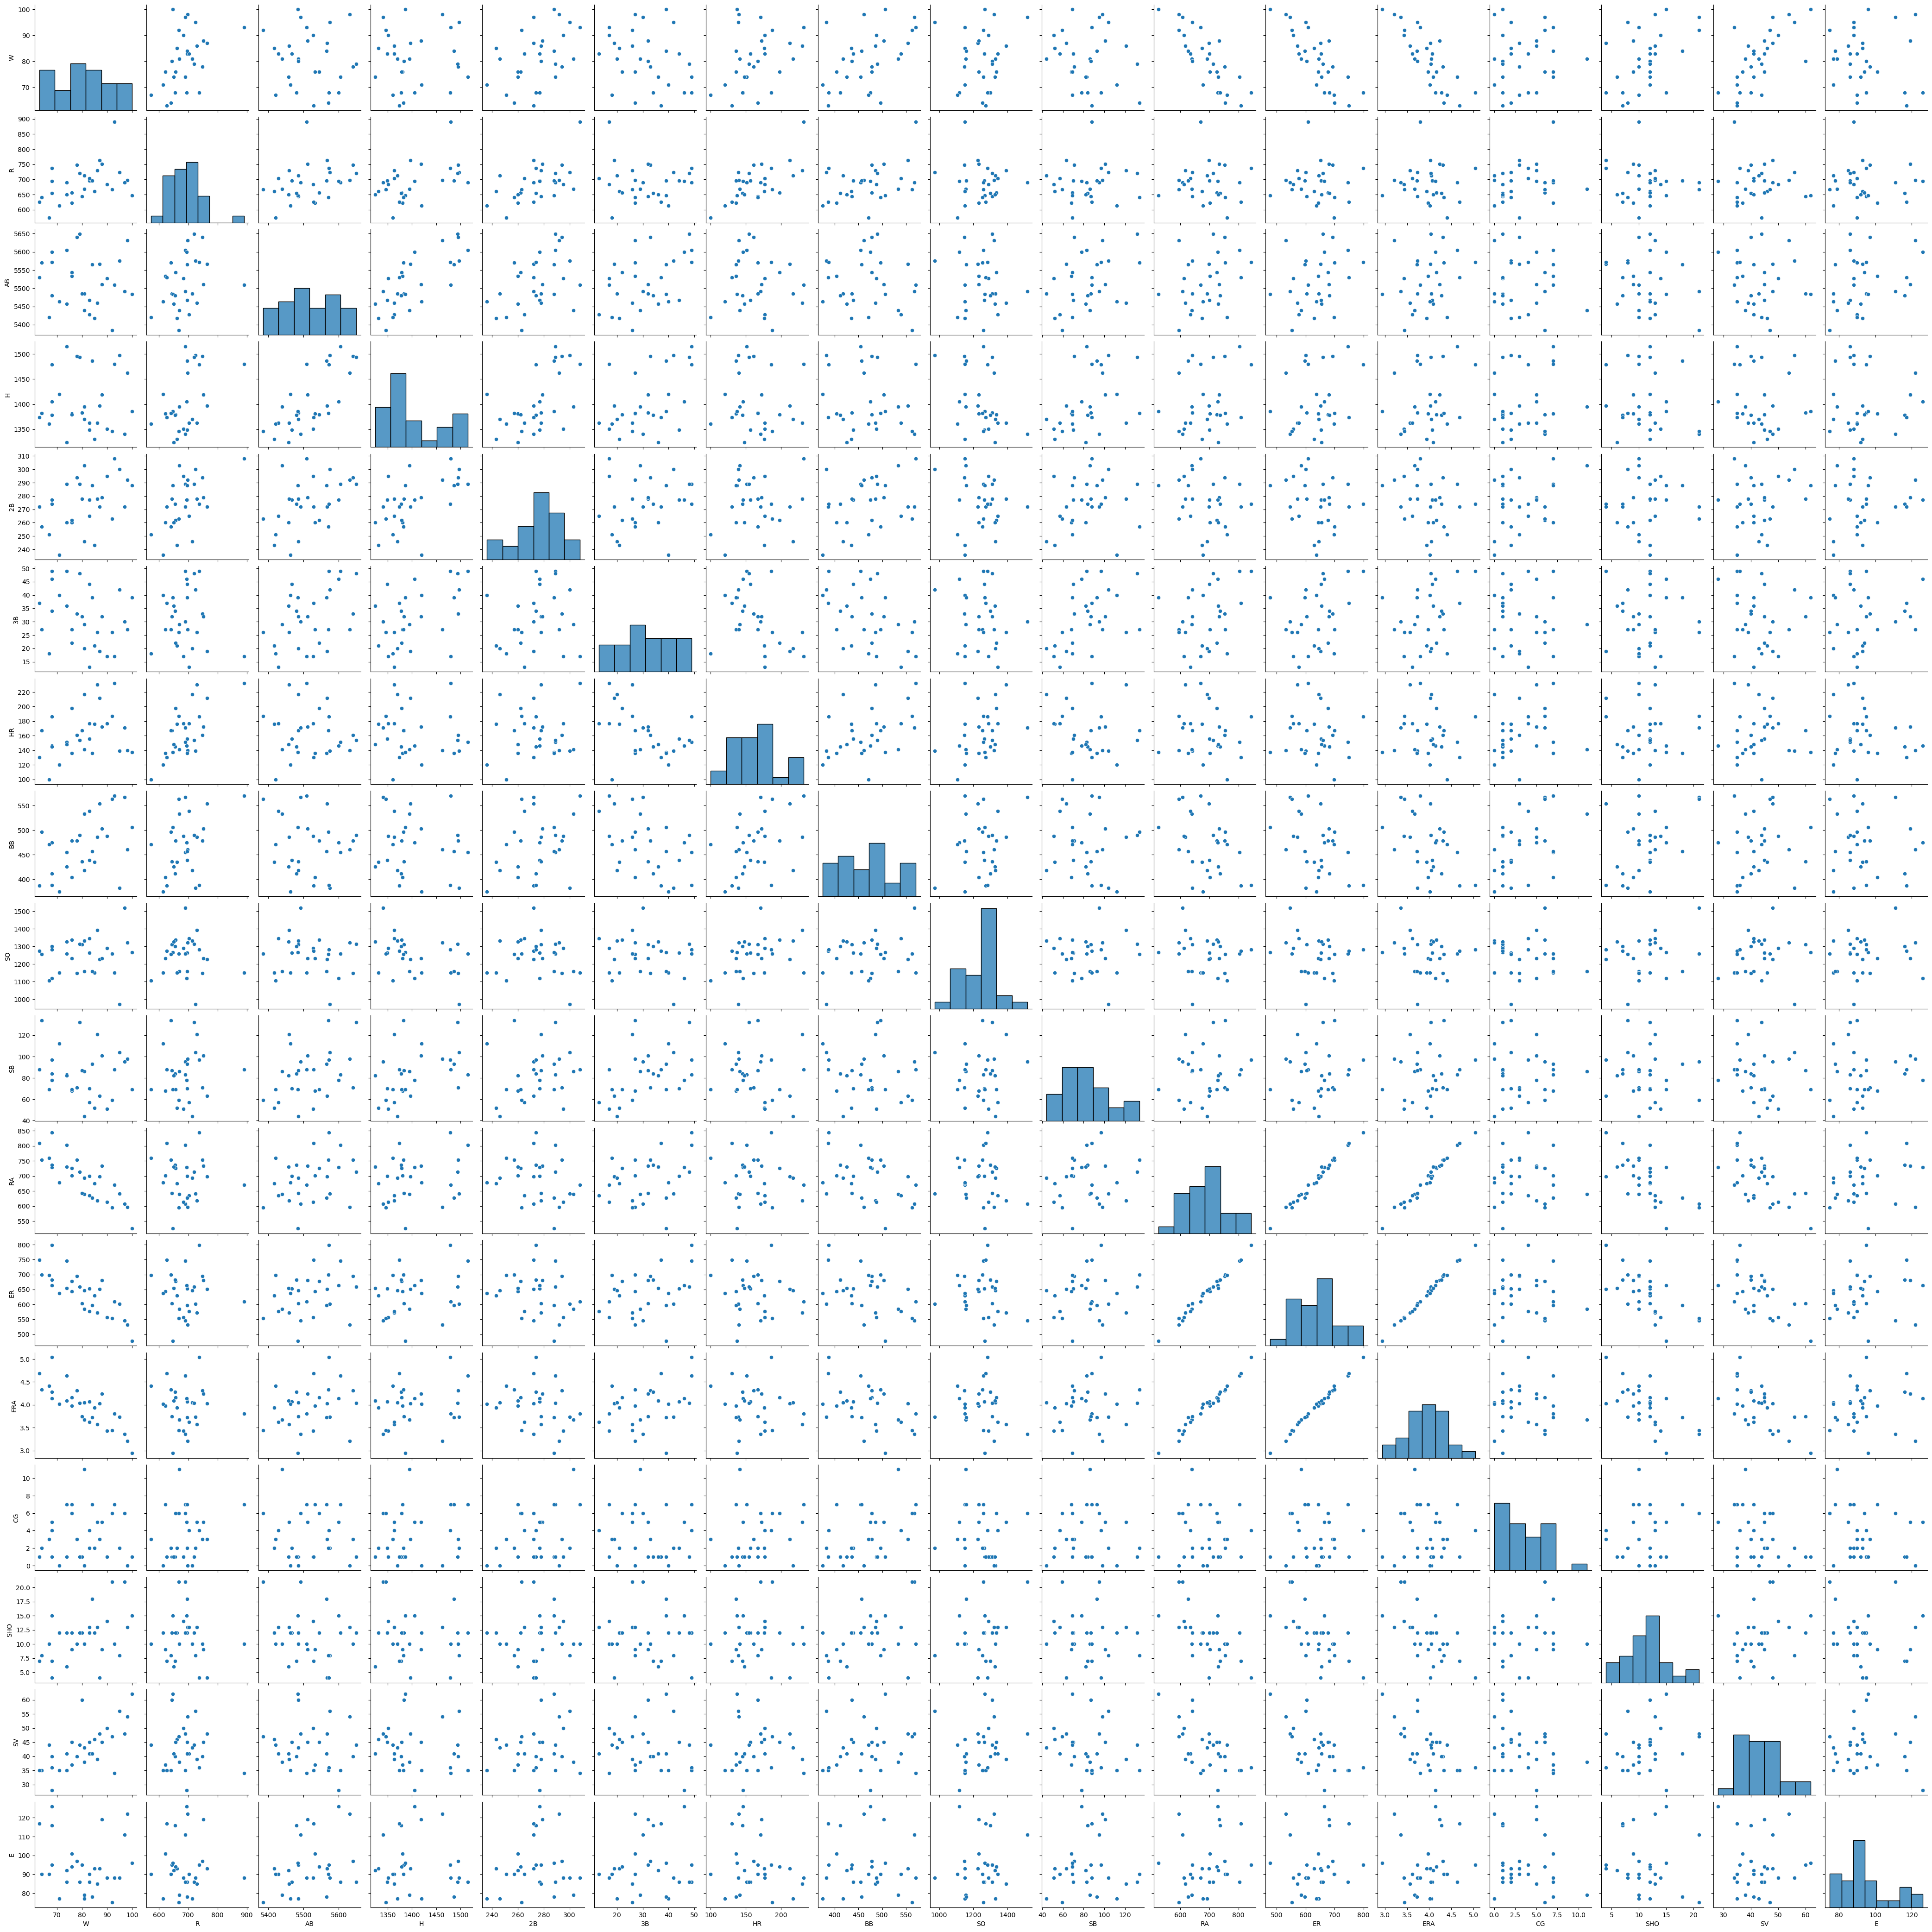

In [17]:
sns.pairplot(df)
plt.show()

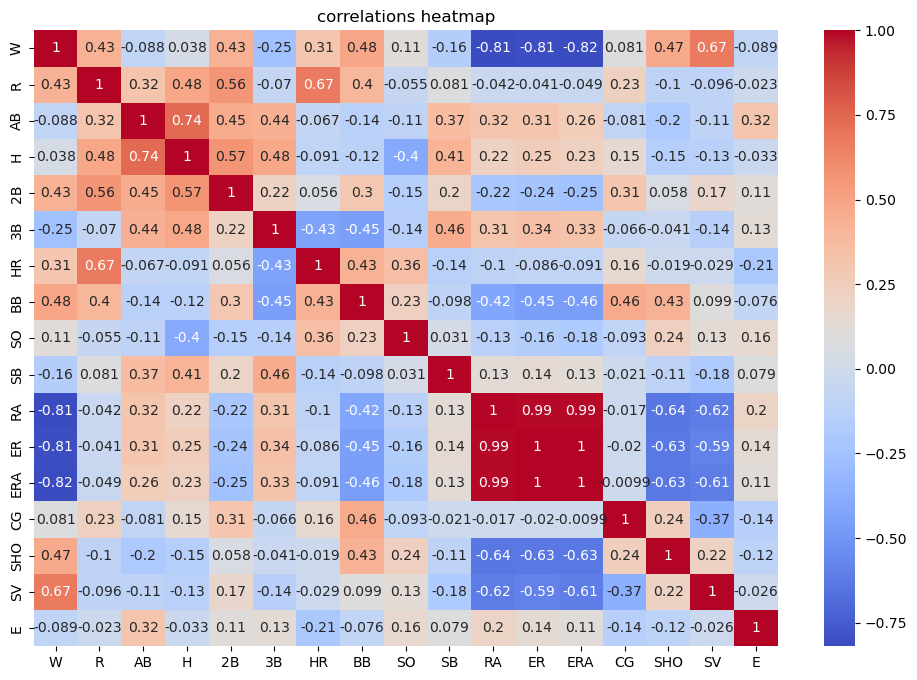

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("correlations heatmap")
plt.show()

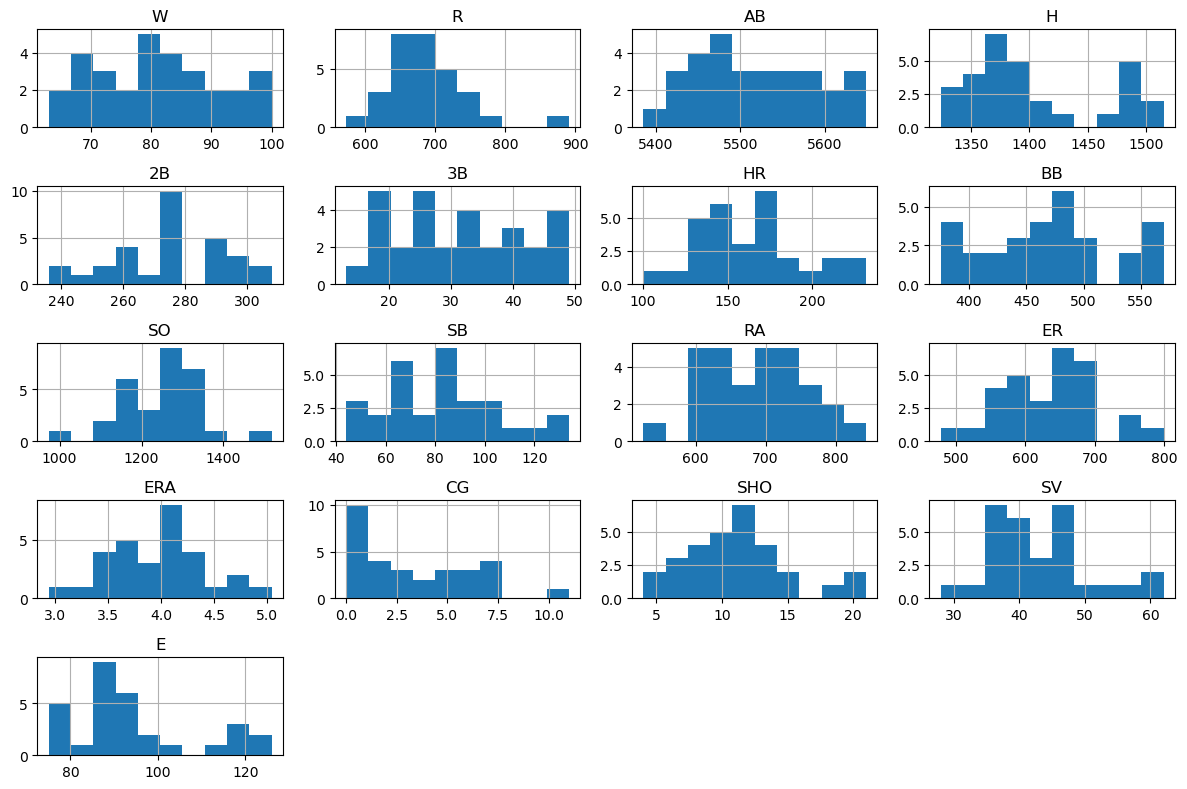

In [19]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Model Building and Evaluation

# Splitting the Data

Split the dataset into training and testing sets.

In [20]:
x=df.drop('W',axis=1)
y=df['W']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Selection

Choose appropriate machine learning models (e.g., linear regression,  random forests) for prediction.

# Model Training

Train the selected models on the training data.

# Model Evaluation

In [22]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred_linear_reg=linear_reg.predict(x_test)

def evaluate_model(y_true,y_pred):
    mse=mean_squared_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    print("mean squared error:",mse)
    print("r-squared:",r2)
    
print("linear regression performance:")
evaluate_model(y_test,y_pred_linear_reg)

linear regression performance:
mean squared error: 27.94303250666688
r-squared: 0.7876400316149446


In [23]:
random_forest=RandomForestRegressor(random_state=42)
random_forest.fit(x_train,y_train)
y_pred_random_forest=random_forest.predict(x_test)

def evaluate_model(y_true,y_pred):
    mse=mean_squared_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    print("mean squared error:",mse)
    print("r-squared:",r2)
    
print("\nRandom Forest Performance:")
evaluate_model(y_test,y_pred_random_forest)



Random Forest Performance:
mean squared error: 51.967916666666675
r-squared: 0.6050569981000633


Evaluate the performance of each model using metrics like mean squared error (MSE), R-squared, etc., on the testing data.

Check for underfitting or overfitting.

# Hyperparameter Tuning

# Grid Search

Perform hyperparameter tuning using technique  grid search  to optimize model performance.

# Tuning Results

In [24]:
linear_reg_param_grid = {
    'fit_intercept': [True, False]
}
linear_reg_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=linear_reg_param_grid, cv=5)
linear_reg_grid_search.fit(x_train,y_train)
best_linear_reg_params = linear_reg_grid_search.best_params_
best_linear_reg_score = linear_reg_grid_search.best_score_
print("Best Linear Regression Hyperparameters:", best_linear_reg_params)
print("Best Linear Regression Score:", best_linear_reg_score)

Best Linear Regression Hyperparameters: {'fit_intercept': False}
Best Linear Regression Score: 0.13888646170380622


In [25]:
random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=random_forest_param_grid, cv=5)
random_forest_grid_search.fit(x_train,y_train)
best_random_forest_params = random_forest_grid_search.best_params_
best_random_forest_score = random_forest_grid_search.best_score_
print("\nBest Random Forest Hyperparameters:", best_random_forest_params)
print("Best Random Forest Score:", best_random_forest_score)


Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Score: 0.4517749048099624


In [26]:
y_train_pred_lr = linear_reg_grid_search.best_estimator_.predict(x_train)
y_test_pred_lr = linear_reg_grid_search.best_estimator_.predict(x_test)
print("Linear Regression Model Evaluation:")
print("Training Set:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred_lr))
print("R-squared:", r2_score(y_train, y_train_pred_lr))

print("\nTesting Set:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_lr))
print("R-squared:", r2_score(y_test, y_test_pred_lr))

Linear Regression Model Evaluation:
Training Set:
Mean Squared Error: 2.933535903316899
R-squared: 0.9698006026538724

Testing Set:
Mean Squared Error: 32.14002597660035
R-squared: 0.7557439444463558


In [27]:
y_train_pred_rf = random_forest_grid_search.best_estimator_.predict(x_train)
y_test_pred_rf = random_forest_grid_search.best_estimator_.predict(x_test)

print("\nRandom Forest Model Evaluation:")
print("Training Set:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred_rf))
print("R-squared:", r2_score(y_train, y_train_pred_rf))

print("\nTesting Set:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred_rf))
print("R-squared:", r2_score(y_test, y_test_pred_rf))


Random Forest Model Evaluation:
Training Set:
Mean Squared Error: 8.25318333333333
R-squared: 0.9150372891049471

Testing Set:
Mean Squared Error: 58.03666666666668
R-squared: 0.5589360354654844


Document the best hyperparameters found for each model and their corresponding performance scores.

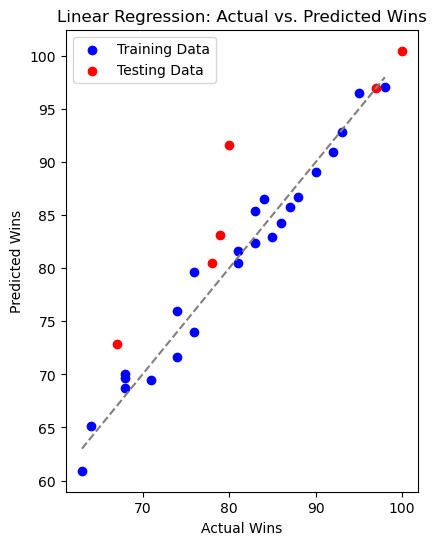

In [28]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_lr, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred_lr, color='red', label='Testing Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='gray')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Linear Regression: Actual vs. Predicted Wins')
plt.legend()

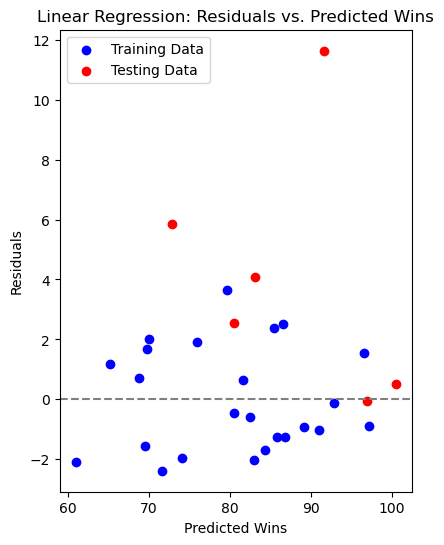

In [29]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_lr, y_train_pred_lr - y_train, color='blue', label='Training Data')
plt.scatter(y_test_pred_lr, y_test_pred_lr - y_test, color='red', label='Testing Data')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Wins')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs. Predicted Wins')
plt.legend()

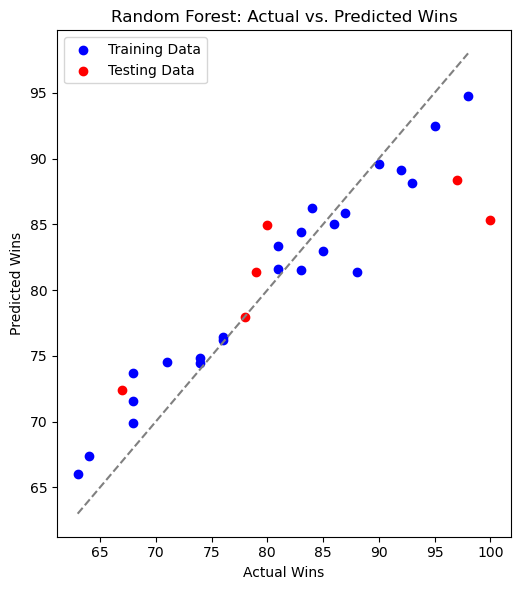

In [30]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred_rf, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred_rf, color='red', label='Testing Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='gray')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Random Forest: Actual vs. Predicted Wins')
plt.legend()

plt.tight_layout()
plt.show()

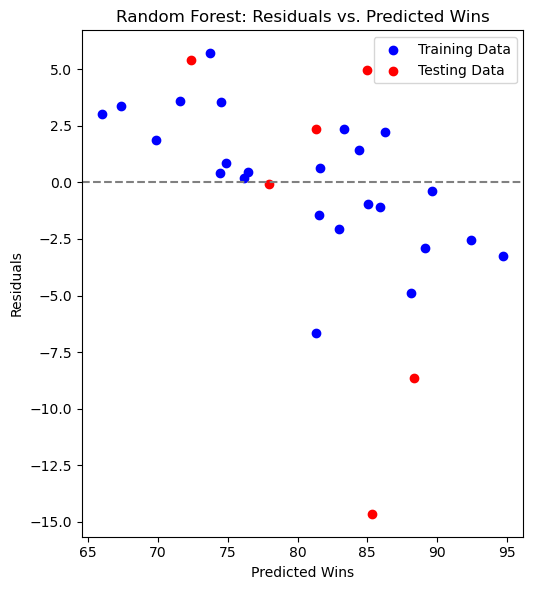

In [31]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_rf, y_train_pred_rf - y_train, color='blue', label='Training Data')
plt.scatter(y_test_pred_rf, y_test_pred_rf - y_test, color='red', label='Testing Data')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Wins')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals vs. Predicted Wins')
plt.legend()

plt.tight_layout()
plt.show()

# Saving the Best Model for Production

Once the final model is selected, it is saved using serialization techniques like pickle or joblib. This allows us to reuse the model for making predictions on new data without having to retrain it from scratch.

In [32]:
import joblib

In [33]:
best_linear_reg_model=linear_reg_grid_search.best_estimator_
joblib.dump(best_linear_reg_model,'best_linear_reg_model.pkl')

['best_linear_reg_model.pkl']

In [34]:
loaded_linear_reg_model = joblib.load('best_linear_reg_model.pkl')
result=loaded_linear_reg_model.score(x_test,y_test)
print(result*100)

75.57439444463559
